# Leetcode刷题(20181015)

## [75-Sort Colors](https://leetcode.com/problems/sort-colors/description/)

### 问题描述

给定一个`n`个对象的数组, 标有红色,白色或绿色, **就地**对它们进行排序,使得相同的颜色能够相邻,并且以红色/白色/绿色的顺序排列.
在这里,我们分别使用整数`0`,`1`和`2`来表示红色/白色/绿色.

**注意:**不能使用库自带的排序函数来解决这个问题.

**示例1**
```
Input: [2,0,2,1,1,0]
Output: [0,0,1,1,2,2]
```

**思考**
- 一个比较直接的方法是使用一个两次遍历的排序算法:第一次迭代时计算`0`/`1`/`2`的数目,然后分别根据计数值来覆盖数组
- 能否提出只使用常数空间的一步遍历算法?

### 解题思路

最简单的方法就是思考中提出的计数法: 分别计算`0`/`1`/`2`的数目, 然后覆盖源数组.

接下来思考一下一步遍历的算法, 使用三个指针,分别指向:最左边的第一个`1`(`left`, 初始化为`-1`)和最右边的最后一个`1`(`right`, 初始化为`len(nums`)以及当前(`now`):
- 如果`nums[now] == 0`
    - 如果 `now > left && left > -1`, `swap(nums, now, left), left += 1, now+= 1`
    - 如果 `now == left`, `now += 1`
- 如果当前数字为`1`
    - 如果 `left == -1`, `left += now, now += 1`
    - 如果 `left > -1`, `now+= 1`
- 如果当前数字为`2`,将其与`right`进行交换,并且`right -= 1`


### 代码

In [5]:
# counter sort
class Solution(object):
    def sortColors(self, nums):
        """
        :type nums: List[int]
        :rtype: void Do not return anything, modify nums in-place instead.
        """
        zero_cnt, one_cnt, two_cnt = 0, 0, 0
        for num in nums:
            if num == 0:
                zero_cnt += 1
            elif num == 1:
                one_cnt += 1
            else:
                two_cnt += 1
        num_idx = self.overwrite(nums, 0, zero_cnt, 0)
        num_idx = self.overwrite(nums, 1, one_cnt, num_idx)
        self.overwrite(nums, 2, two_cnt, num_idx)
    
    
    def overwrite(self, nums, num, cnt, num_idx):
        while cnt > 0:
            nums[num_idx] = num
            num_idx += 1
            cnt -= 1
        return num_idx

In [25]:
class Solution(object):
    def sortColors(self, nums):
        """
        :type nums: List[int]
        :rtype: void Do not return anything, modify nums in-place instead.
        """
        left, now, right = -1, 0, len(nums)-1
        while now <= right:
            if nums[now] == 0 and left > -1:
                nums[left], nums[now] = nums[now], nums[left]
                left += 1
            elif nums[now] == 1 and left == -1:
                left = now
            elif nums[now] == 2:
                nums[now], nums[right] = nums[right], nums[now]
                right -= 1
                now -= 1
            now += 1

In [27]:
# test case
s = Solution()
nums = [1,2,2,2,2,0,0,0,1,1]
s.sortColors(nums)
print nums

[0, 0, 0, 1, 1, 1, 2, 2, 2, 2]


## [76-Minimum Window Substring](https://leetcode.com/problems/minimum-window-substring/description/)

### 问题描述

给定两个字符串`S`和`T`, 在时间复杂度`O(n)`以内, 找到`S`中包含`T`中所有字符的最小时间窗口.

**示例**
```
Input: S = "ADOBECODEBANC", T = "ABC"
Output: "BANC"
```

**注意**:

- 如果`S`中没有窗口能够覆盖`T`中的所有字符, 返回空字符串`""`
- 如果存在这样一个窗口, 可以假设在`S`中只会有一个唯一的最小窗口

### 解题思路

本题的主要考察点其实是如何维护一个字符串窗口, 涉及到两个操作:
- 当子串没有完全包含`T`时, 需要向右扩展
- 当子串完全包含`T`时, 需要从左压缩

使用一个哈希结构(`char_dict`)存储`T`的所有字符及其出现的次数, `key`为字符, `value`为出现次数

初始化: `start_idx = 0`, `match_cnt = 0`

遍历`S`, 对于当前字符, 如果不在`char_dict`中,则继续, 否则:
- `char_dict[s[i]] -= 1`, `mactch_cnt += 1`
    - 如果`match_cnt == len(T)`, 表示已经匹配完成了, 此时需要从左压缩: 判断其中是否有可能匹配的子串, 更新相关值
    - `match_cnt -= 1, start_idx += 1`

PS: 在一些资料里面还看到了可以用一个`256`的数组替代哈希结构,这样可以提高效率.
    
### 代码

In [34]:
class Solution(object):
    def minWindow(self, s, t):
        """
        :type s: str
        :type t: str
        :rtype: str
        """
        char_dict = dict()
        for t_char in t:
            cnt = 1
            if t_char in char_dict:
                cnt += char_dict[t_char]
            char_dict[t_char] = cnt
        start_idx, match_cnt, min_start, min_window = 0, 0, 0, len(s)+1
        for end_idx in range(len(s)):
            char = s[end_idx]
            if char in char_dict:
                char_dict[char] -= 1
                if char_dict[char] >= 0:
                    match_cnt += 1
            while match_cnt == len(t):
                if end_idx - start_idx + 1 < min_window:
                    min_window = end_idx - start_idx + 1
                    min_start = start_idx
                if s[start_idx] in char_dict:
                    char_dict[s[start_idx]] += 1
                    if char_dict[s[start_idx]] > 0:
                        match_cnt -= 1
                start_idx += 1
        print min_start, min_window
        return s[min_start: min_start + min_window] if min_window <= len(s) else ""

In [37]:
sl = Solution()
S = "ADOBECODEBANC"
T = "ABC"
print sl.minWindow(S, T)

9 4
BANC


## [77-Combinations](https://leetcode.com/problems/combinations/description/)

### 问题描述

给定两个整数`n`和`k`, 返回从`1`到`n`的`k`个数的所有可能组合.

**示例**
```
Input: n = 4, k = 2
Output:
[
  [2,4],
  [3,4],
  [2,3],
  [1,2],
  [1,3],
  [1,4],
]
```

### 解题思路

初始化一个长度为`n`的`list`
尝试找下规律:
- `k=1`, 那么直接返回`list`即可
- `k=2`, 基于之前的结果, 遍历之前的结果`list`, 第一个指针指向`1+i`, 向后移动, 直到`n-1`为止, 外层循环直到`1+i==n`为止
- `k=3`, 基于之前的结果, 遍历之前的结果`list`, 第一个指针指向`2+i`, 向后移动, 直到`n-1`为止, 外层循环直到`2+i==n`为止
- ...

很明显, 这个问题可以是一个递归问题

### 代码

In [20]:
class Solution(object):
    def combine(self, n, k):
        """
        :type n: int
        :type k: int
        :rtype: List[List[int]]
        """
        if k == 0:
            return list()
        ans = [[i+1] for i in range(n)]
        for i in range(2, k+1):
            ans = self.combineArr(ans, i, n)
        return ans
        
    def combineArr(self, ans, k, n):
        new_ans = list()
        for i in range(len(ans)):
            start = ans[i][-1] + 1
            arr = ans[i]
            while start <= n:
                now_arr = arr + [ start ]
                new_ans.append(now_arr)
                start += 1
        return new_ans


In [21]:
s = Solution()
n = 4
k = 3
print s.combine(n, k)

[[1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4]]


## [78-Subsets](https://leetcode.com/problems/subsets/description/)

### 问题描述

给定一个**不重复**的整数集合, `nums`, 返回所有可能的子集(指数集合).

**注意:** 方案集合不能包含重复的子集.

**示例**
```
Input: nums = [1,2,3]
Output:
[
  [3],
  [1],
  [2],
  [1,2,3],
  [1,3],
  [2,3],
  [1,2],
  []
]
```

### 解题思路

这个题目感觉和上一题类似, `k`从`0`到`len(n)`, 将所有集合都加到一起即可.

只不过需要把`combineArr`函数中间的`append`的过程修改一下, 需要把`start`的计算改一下.

### 代码

In [30]:
class Solution(object):
    def subsets(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        n = len(nums)
        pos_dict = dict()
        for i in range(n):
            pos_dict[nums[i]] = i
        total_ans = list()
        ans = list()
        for i in range(n+1):
            ans = self.combineArr(ans, i, n, nums, pos_dict)
            total_ans += ans
        return total_ans
        
    def combineArr(self, ans, k, n, nums, pos_dict):
        new_ans = list()
        if k == 0:
            return [[]]
        if k == 1:
            return [[nums[i]] for i in range(n)]
        for i in range(len(ans)):
            start = pos_dict[ans[i][-1]] + 1
            arr = ans[i]
            while start < n:
                now_arr = arr + [nums[start]]
                new_ans.append(now_arr)
                start += 1
        return new_ans

In [31]:
nums = [1,2,3]
s = Solution()
print s.subsets(nums)

[[], [1], [2], [3], [1, 2], [1, 3], [2, 3], [1, 2, 3]]


## [79-Word Search](https://leetcode.com/problems/word-search/)

### 问题描述

给定一个2维的单词板和一个单词, 判断该单词是否存在于板中.

该单词可以是从顺序相连的格子总共组成的, 其中相连表示横向或纵向相连. 相同的字符格不能使用超过`1`次.

**示例**
```
board =
[
  ['A','B','C','E'],
  ['S','F','C','S'],
  ['A','D','E','E']
]

给定 word = "ABCCED", 返回 true.
给定 word = "SEE", 返回 true.
给定 word = "ABCB", 返回 false.
```

### 解决思路

这是一个典型的回溯问题, 从坐标`(0,0)`开始, 判断当前字符与第`i`个字符是否相等:

- 如果相等, 那么判断上下左右是否与第`i+1`是否匹配, 一旦有, 继续, 没有的话就返回`false`
- 如果不相等, 直接向右走


### 代码

In [17]:
class Solution(object):
    def exist(self, board, word):
        """
        :type board: List[List[str]]
        :type word: str
        :rtype: bool
        """
        for i in range(len(board)):
            for j in range(len(board[i])):
                empty_set = set()
                if self.existIndex(board, word, i, j, 0, empty_set):
                    return True
        return False

    def existIndex(self, board, word, i, j, k, index_set):
        if i < 0 or i >= len(board) or j < 0 or j >= len(board[i]) or (i, j) in index_set or board[i][j] != word[k]:
            return False
        if k == len(word) - 1:
            return True
        index_set.add((i, j))
        next_res = self.existIndex(board, word, i - 1, j, k + 1, index_set) or self.existIndex(board, word, i + 1, j, k + 1,
                                                                                           index_set) or self.existIndex(
            board, word, i, j - 1, k + 1, index_set) or self.existIndex(board, word, i, j + 1, k + 1, index_set)
        if not next_res:
            index_set.remove((i, j))
        else:
            return True

In [18]:
board =[['A','B','C','E'],['S','F','C','S'],['A','D','E','E']]
word = "ABCB"
s = Solution()
res = s.exist(board, word)
print(res)

False


## [80-Remove Duplicates from Sorted Array II](https://leetcode.com/problems/remove-duplicates-from-sorted-array-ii/description/)

### 问题描述

给定一个排序好的数字`nums`, **就地**删除重复的数字保证重复的数字之多只能出现*两次*, 并且返回新的长度.

不能为另一个数组分配额外的额外的空间, 只能使用`O(1)`的额外空间来**修改输入数组**实现该功能.

**示例1**
```
给定 nums = [1,1,1,2,2,3],

函数应该返回 length = 5, nums数组的前5个元素分别为: 1, 1, 2, 2 以及 3.

数组第5位之后的元素没有任何关系.
```
**示例2**
```
给定 nums = [0,0,1,1,1,1,2,3,3],

函数应该返回 length = 7, nums数组的前7个元素分别为 0, 0, 1, 1, 2, 3 以及 3.

数组第7位之后的元素没有任何关系.
```

**说明**
- 疑惑为什么返回的值是一个整数但是回答是一个数组?
- 注意输入的数组是通过**引用**传递的, 这就意味着对输入数组的修改对调用者也是可以感知的.
- 内部可以这样想:

```
// nums 通过引用传递 (例如, 不用复制数组)
int len = removeDuplicates(nums);

// 对输入数组的修改对调用者也是可以感知的.
// 使用函数返回的长度, 可以打印前len长度的元素
for (int i = 0; i < len; i++) {
    print(nums[i]);
}
```

### 解题思路

使用两个指针指向`nums`数组, 其中,第一个指针标识待替换的索引, 第二个指针标识当前需要替换的元素.
两个问题, 需要替换的索引, 使用两个元素存储信息:
- `num`标识当前的数字
- `num_cnt`标识当前数字的重复次数

待替换的索引: 当`num_cnt > 2`时, 该索引停止向前
需要替换的索引: 当`num_cnt < 2`时, 将该数值填充到待替换的索引`num_cnt`次, 待替换索引向前

### 代码

In [28]:
class Solution(object):
    def removeDuplicates(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        if len(nums) == 0:
            return 0
        start, end, num_cnt = 0, 1, 1
        num = nums[0]
        while end < len(nums):
            while end < len(nums) and nums[end] == num:
                num_cnt += 1
                end += 1
            if num_cnt > 2:
                nums[start] = num
                start += 1
                nums[start] = num
                start += 1
                num_cnt = 0
            else:
                while num_cnt > 0:
                    nums[start] = num
                    start += 1
                    num_cnt -= 1
            if end < len(nums):
                num = nums[end]
        return 1 if start == 0 else start

In [29]:
s = Solution()
nums = [0,0,1,1,1,1,2,3,3]
print(s.removeDuplicates(nums))

7


## [81-Search in Rotated Sorted Array II](https://leetcode.com/problems/search-in-rotated-sorted-array-ii/description/)

### 问题描述

假设一个数组是在一个我们之前不知道的轴点旋转的升序数组.(例如, `[0,0,1,2,2,5,6]`可能变成`[2,5,6,0,0,1,2]`).

给定一个待搜索的目标, 如果其在数组中出现, 返回`true`, 否则的话返回`false`.

**示例1**
```
Input: nums = [2,5,6,0,0,1,2], target = 0
Output: true
```

**示例2**
```
Input: nums = [2,5,6,0,0,1,2], target = 3
Output: false
```

**思考**
-  这是一个类似于`33`题的一个问题, 但是本题中`nums`可能包含重复值
- 这是否会影响复杂性? 如何影响的又是为什么会影响?

### 解题思路

其实这一题与之前的`33`题的整体思路类似, 让我们回顾一下这个题目的解法.

数组只可能有下面三种情况:
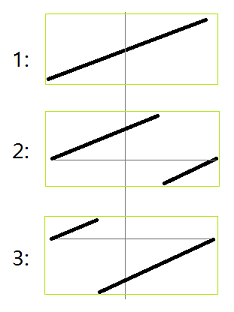

假设`l`表示左边缘,`r`表示右边缘, `m`表示中间的值, 有三种情况:
- 如果`nums[m] == target`, 直接返回`true`
- 如果`nums[m] < nums[r]`, 表示数组从`m`到`r`一定是有序的(没有受`rotate`的影响), 那么只需要根据情况向左或者向右移动即可
- 否则, 表示数组从`l`到`m`一定是有序的,也只需要根据情况向左或者向右移动即可

本题的不同之处在于:可能出现重复的数值, 因此,如果出现`nums[m]==nums[r]`的情况, 我们就丢失了哪边有序的信息，因为哪边都有可能是有序的结果。这个时候就需要对边缘进行移动, 直到边缘不等于中间值或者与中间相遇为止, 才可以判断某一边是否有序的情况.所以最坏情况（比如全部都是一个元素，或者只有一个元素不同于其他元素，而它就在最后一个）就会出现每次移动一步, 此时最坏的时间复杂度为`O(n)`.

### 代码

In [42]:
class Solution(object):
    def search(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: bool
        """
        l, r = 0, len(nums)-1
        while l <= r:
            m = int((l+r) / 2)
            if target == nums[m]:
                return True
            if nums[m] < nums[r]:
                if nums[m] < target and nums[r] >= target:
                    l = m + 1
                else:
                    r = m - 1
            elif nums[m] > nums[r]:
                if nums[m] > target and nums[l] <= target:
                    r = m - 1
                else:
                    l = m + 1
            else:
                r -= 1
        return False

In [43]:
s = Solution()
nums = [3,1,2,3,3,3,3]
print(s.search(nums, 1))


True
